c:\Users\RAUNAQUE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Lookalike1' 'Lookalike2' 'Lookalike3']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


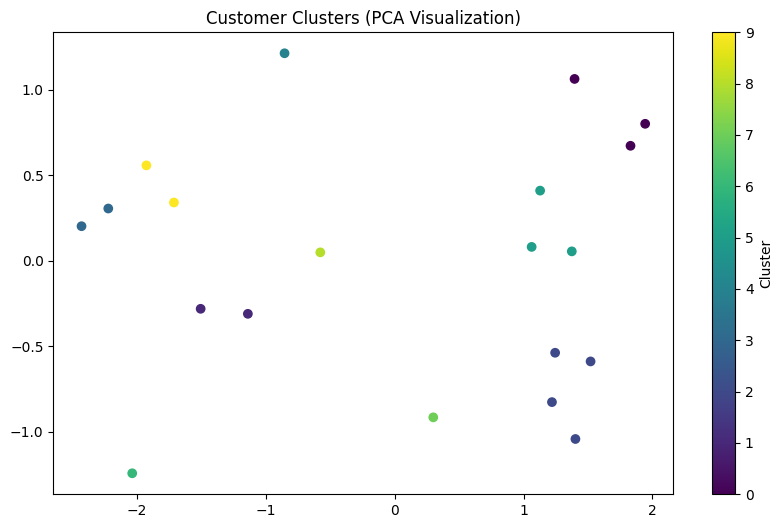

Number of Clusters Formed: 10
Davies-Bouldin Index: 0.440
Silhouette Score: 0.421


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = pd.read_csv(r"FirstName_LastName_Lookalike.csv")

features = features.drop('CustomerID', axis=1)  
features = features.apply(pd.to_numeric, errors='coerce')  

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

scaler = StandardScaler()
scaled = scaler.fit_transform(features_imputed)

db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled)
    db_scores.append(davies_bouldin_score(scaled, clusters))

optimal_k = range(2, 11)[np.argmin(db_scores)]

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()

print(f"Number of Clusters Formed: {optimal_k}")  
print(f"Davies-Bouldin Index: {min(db_scores):.3f}")  
print(f"Silhouette Score: {silhouette_score(scaled, clusters):.3f}")  